In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
mlc_df = pd.read_csv('../data/Matching Sample for NSS (100k Lines).xlsx - MLC Data Sample.csv')

In [4]:
mlc_df.head()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [5]:
mlc_df.tail()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1
99999,QZK6F2019397,QZ,K6F,20.0,2/1/2021,Spotify,"11,245",Lexie Liu,泥鞋（北京）文化传媒有限公司,黑洞 Metropolis,无限意识 Meta Ego,259,1


In [6]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   If                                         98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  object 
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [7]:
mlc_df.describe()

,Year of Reference,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
count,98239.000000,100000.000000,100000.000000
mean,19.671933,1016.893690,0.541610
std,12.638870,15565.692133,0.498268
min,0.000000,0.000000,0.000000
25%,17.000000,149.000000,0.000000
50%,19.000000,190.000000,1.000000
75%,20.000000,236.000000,1.000000
max,99.000000,818738.000000,1.000000


Experimenting with how to rename columns

In [8]:
mlc_df.columns.values[12] = 'Songwriter'

In [9]:
mlc_df.columns.values[0] = 'ISRC'

Renaming all columns

In [10]:
mlc_df.columns = ['ISRC', 'Country', 'Registrant', 'Release_Year', 'Period', 'DSP', 'Streams', 'Artist', 'Label', 'Song', 'Album', 'Duration', 'Songwriter']

In [11]:
mlc_df.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [12]:
mlc_df.isnull().sum()

ISRC            1760
Country         1697
Registrant      1697
Release_Year    1761
Period          8102
DSP             3999
Streams            0
Artist             0
Label           1008
Song               0
Album             69
Duration           0
Songwriter         0
dtype: int64

In [13]:
mlc_df.Songwriter.value_counts()

1    54161
0    45839
Name: Songwriter, dtype: int64

In [14]:
mlc_df.Country.value_counts()

US    41621
QZ    17189
QM     8409
TC     8295
GB     6611
      ...  
QA        1
FX        1
PT        1
BO        1
CL        1
Name: Country, Length: 77, dtype: int64

In [15]:
mlc_df.Release_Year.value_counts()

20.0    31143
21.0    13510
19.0    11577
18.0     8556
17.0     6025
        ...  
44.0        2
50.0        1
48.0        1
49.0        1
40.0        1
Name: Release_Year, Length: 95, dtype: int64

In [16]:
mlc_df.DSP.value_counts()

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: DSP, dtype: int64

In [17]:
mlc_df.Artist.nunique()

21149

In [18]:
mlc_df.Label.nunique()

11778

In [19]:
mlc_df.Country.nunique()

77

Trying to work on possible correlations? All the plots are too big and making my computer run loudly but doesn't actually produce any plots. The correlations I've tried have given errors (April 21st)

In [20]:
print(mlc_df.corr())

              Release_Year  Duration  Songwriter
Release_Year      1.000000 -0.000481   -0.004529
Duration         -0.000481  1.000000   -0.020790
Songwriter       -0.004529 -0.020790    1.000000


In [21]:
mlc_df.groupby('DSP')['Artist'].value_counts()

DSP           Artist                                  
Amazon        Various artists                             906
              Pinkfong                                    142
              Jim Gaffigan                                141
              Cocomelon                                   128
              Thunderstorm Global Project from TraxLab    117
                                                         ... 
iHeart Radio  Yo Gotti feat. Lil Baby                       1
              Young Thug & Young Stoner Life Records        1
              Zomboy featuring Bok Nero                     1
              grandson                                      1
              scondaz                                       1
Name: Artist, Length: 26773, dtype: int64

In [22]:
mlc_df['Artist'].value_counts().loc[lambda x : x>1]

Various artists                         967
Lil Durk                                446
Zach Bryan                              394
Youngboy Never Broke Again              335
Taylor Swift                            313
                                       ... 
Sir Malcolm Sargent                       2
Megan Thee Stallion|Bankroll Freddie      2
Logic & Marshmello                        2
Kiana Ledé,Jacquees                       2
SEBii,Maple                               2
Name: Artist, Length: 10875, dtype: int64

In [23]:
mlc_df.groupby('DSP')['Streams'].value_counts()

DSP           Streams 
Amazon          1,132     21
                827       15
                909       14
                1,030     13
                829       13
                          ..
iHeart Radio    98         1
                980        1
                982        1
                984        1
                993        1
Name: Streams, Length: 70082, dtype: int64

In [24]:
#Code from Scott and Rob
#mlc_df.groupby(['DSP', 'Label']).agg({'Streams': ['sum']})
#pd.reset_option('^display.', silent=True)
#.sum().reset_index(name='num_streams').sort_values

In [25]:
#Looking for any relationship between DSP and Label - nulls, etc.

In [26]:
mlc_df.groupby('DSP')['Label'].value_counts()

DSP           Label                   
Amazon        Walt Disney Records         353
              Deutsche Grammophon (DG)    316
              Decca Music Group Ltd.      277
              Atlantic Records            244
              Moonbug Entertainment       221
                                         ... 
iHeart Radio  WEA Roadrunner                1
              Wall Recordings               1
              Winners Circle  EMPIRE        1
              Winter Hill Records           1
              j.Nile Entertainment          1
Name: Label, Length: 17232, dtype: int64

In [27]:
mlc_df.Label.value_counts()

Atlantic Records                      1384
Lofi Records                          1232
Warner Records                         995
Columbia                               843
Universal                              818
                                      ... 
Twenty7 Records / Human Re Sources       1
Hip-O Select / Motown                    1
NyxTheShield                             1
Relaxing Sounds For Studying             1
Universal Music Taiwan                   1
Name: Label, Length: 11778, dtype: int64

In [28]:
dsp_and_label = mlc_df[['DSP', 'Label', 'Streams']]
print(dsp_and_label.head())

          DSP     Label     Streams
0   AudioMack       NaN     10,175 
1  SoundCloud  LUCKY3RD      8,597 
2  SoundCloud  LUCKY3RD    261,280 
3      Trebel   Orchard          5 
4   AudioMack       NaN     62,105 


In [29]:
dsp_and_label['total_streams'] = ' '

/var/folders/4_/948td82x7jlf4pz0c4dtqn_00000gn/T/ipykernel_48042/2254150335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsp_and_label['total_streams'] = ' '


In [30]:
print(dsp_and_label.head())

          DSP     Label     Streams total_streams
0   AudioMack       NaN     10,175               
1  SoundCloud  LUCKY3RD      8,597               
2  SoundCloud  LUCKY3RD    261,280               
3      Trebel   Orchard          5               
4   AudioMack       NaN     62,105               


In [31]:
dsp_and_label['Streams']= dsp_and_label['Streams'].str.replace(',','')

/var/folders/4_/948td82x7jlf4pz0c4dtqn_00000gn/T/ipykernel_48042/2726350608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsp_and_label['Streams']= dsp_and_label['Streams'].str.replace(',','')


In [32]:
dsp_and_label['Streams']=dsp_and_label['Streams'].astype(int)

/var/folders/4_/948td82x7jlf4pz0c4dtqn_00000gn/T/ipykernel_48042/383836427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsp_and_label['Streams']=dsp_and_label['Streams'].astype(int)


In [33]:
dsp_by_stream = dsp_and_label.groupby(['DSP'])['Streams'].sum().reset_index(name='num_streams').sort_values(by='num_streams', ascending=False)

In [34]:
stream_sum_dsp = mlc_df.groupby(['DSP'])['Streams'].sum().sort_values(ascending=False)

In [35]:
dsp_by_stream.head(10)

,DSP,num_streams
22,Spotify,2552563722
2,Apple,1606453701
15,Pandora,874236566
21,SoundCloud,166813813
27,YouTube,158031119
0,Amazon,151199800
23,Tidal,48793126
3,AudioMack,11991559
9,Melodyv,5384657
28,iHeart Radio,2141959


dsp_by_stream = dsp_and_label.groupby(['DSP'])['Streams'].sum().sort_values(ascending=False)

dsp_by_stream.head(10)

In [36]:
top_10 = dsp_by_stream.head(10)

In [37]:
print(top_10)

             DSP  num_streams
22       Spotify   2552563722
2          Apple   1606453701
15       Pandora    874236566
21    SoundCloud    166813813
27       YouTube    158031119
0         Amazon    151199800
23         Tidal     48793126
3      AudioMack     11991559
9        Melodyv      5384657
28  iHeart Radio      2141959


In [38]:
top_10.columns = ['DSP', 'Streams'] 

In [39]:
print(top_10)

             DSP     Streams
22       Spotify  2552563722
2          Apple  1606453701
15       Pandora   874236566
21    SoundCloud   166813813
27       YouTube   158031119
0         Amazon   151199800
23         Tidal    48793126
3      AudioMack    11991559
9        Melodyv     5384657
28  iHeart Radio     2141959


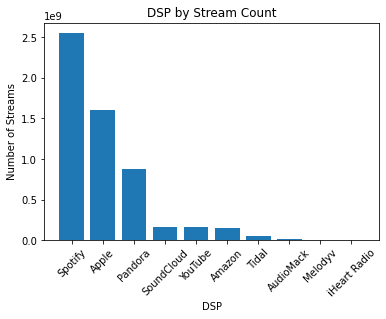

In [58]:
plt.bar(top_10.DSP, top_10.Streams)
xlab = 'DSP'
ylab = 'Number of Streams'
title = 'DSP by Stream Count'

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.xticks(rotation = 45)

plt.title('DSP by Stream Count')
plt.show()

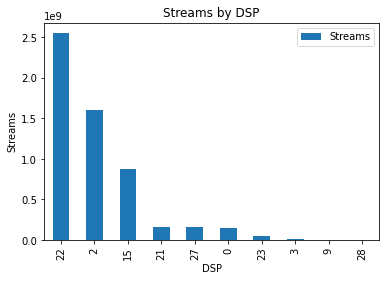

In [54]:
top_10.plot(kind="bar")
plt.title("Streams by DSP")
plt.xlabel("DSP")
plt.ylabel("Streams");

/var/folders/4_/948td82x7jlf4pz0c4dtqn_00000gn/T/ipykernel_48042/1073306747.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


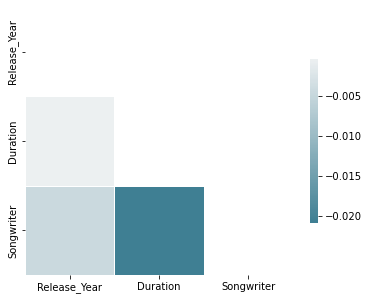

In [41]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = mlc_df.corr()
# create a custom diverging colormap (cmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True) #sns.diverging_palette - google to find color options

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio, what we want shown and not shown
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});